In [1]:
import gspread
from os import path

gc = gspread.service_account(filename='./oauth.json')
print("Login successful")

Login successful


In [2]:
import pandas as pd
from src.tournament import Table, Player

worksheet = gc.open('tournament sheet').worksheet("Data")

games = pd.DataFrame.from_records(worksheet.get("B2:E210"))

players = {}

def get_or_make_player(name):
    player = players.get(name, Player(name))
    players[name] = player
    return player

# Convert player strings to player objects
games = games.applymap(get_or_make_player)
# Create a table for each row.
games = games.apply(lambda game: Table(players=game), axis=1)

print(f'Tables = {games.shape[0]}, Players = {len(players)}')

Tables = 209, Players = 19


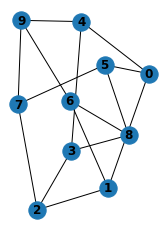

In [4]:
def update_player_histories(table):
    for player in table:
        player.play_table(table)

# Play each table so player histories is populated
games.apply(update_player_histories)

games.head()

0    [{ "name": "Joking101", "history: {"Neiv3.14":...
1    [{ "name": "DefinitelyNotKevin", "history: {"J...
2    [{ "name": "DefinitelyNotKevin", "history: {"J...
3    [{ "name": "Emerald", "history: {"Joking101": ...
4    [{ "name": "DefinitelyNotKevin", "history: {"J...
dtype: object